In [31]:
from PIL import Image
import io
import networkx as nx
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
from itertools import combinations
from IPython import display
import time

def animate_paths_with_population_transfer(list_of_paths, transfer_fractions, initial_population, 
                                         Fs=[0, 1, 2, 3, 4], delay=1.5, save_path='animation.gif'):
    """
    Animates paths with population transfers and saves as GIF
    
    Args:
        ... (previous args remain the same) ...
        save_path: Path where to save the GIF file
    """
    # Store frames for GIF
    frames = []
    
    G = nx.DiGraph()
    
    # Setup node positions
    row_labels = []
    for i in Fs:
        for j in range(2 * i + 1):
            mF = i - j
            row_labels.append([i, mF])
    
    pos = {
        '-2': (-2, -2),
        '-1': (-1, -2),
        '0': (0, -2),
        '1': (1, -2),
        '2': (2, -2),
    }
    for i in row_labels:
        pos[f"{i}"] = (i[1], abs(i[0] - 4))

    # Add all nodes with positions
    for node in pos.keys():
        G.add_node(node, pos=pos[node])
    
    # Convert paths to strings
    string_paths = [[str(node) if not isinstance(node, list) else str(node) for node in path] 
                   for path in list_of_paths]
    
    # Initialize population tracking
    node_populations = {}  # Track current population of each node
    population_history = {}  # Track population changes over time
    
    # Set initial population
    start_node = string_paths[0][0]  # Assume all paths start from same node
    node_populations[start_node] = initial_population
    
    # Create list of all population transfer events
    transfer_events = []
    for path, fraction in zip(string_paths, transfer_fractions):
        from_node = path[0]
        to_node = path[1]
        
        # Calculate population transfer
        transfer_amount = int(node_populations[from_node] * fraction)
        
        # Update populations
        if to_node not in node_populations:
            node_populations[to_node] = 0
        node_populations[from_node] -= transfer_amount
        node_populations[to_node] += transfer_amount
        
        # Store the event
        transfer_events.append({
            'edge': (from_node, to_node),
            'from_pop': node_populations[from_node],
            'to_pop': node_populations[to_node],
            'transfer': transfer_amount
        })
        
        # Store in history
        step = len(transfer_events) - 1
        for node, pop in node_populations.items():
            if node not in population_history:
                population_history[node] = {}
            population_history[node][step] = pop

    def capture_frame():
        # Save current figure to a buffer
        buf = io.BytesIO()
        plt.savefig(buf, format='png', bbox_inches='tight', dpi=100)
        buf.seek(0)
        return Image.open(buf)

    def draw_frame(step, current_edge=None):
        plt.clf()
        ax = plt.gca()
        
        # Draw nodes
        xh = 0.5
        yh = 0.25
        for node, (x, y) in pos.items():
            # Draw node rectangle
            ax.add_patch(Rectangle((x - xh / 2, y - yh / 2), xh, yh, 
                                 fill=True, color='black', ec='black', lw=1))
            
            # Add population text below node if it has a population
            if node in population_history and step in population_history[node]:
                plt.text(x, y - yh/2 - 0.1, f'({population_history[node][step]})', 
                        ha='center', va='top', color='black')
        
        # Draw single current edge if exists
        if current_edge:
            temp_graph = nx.DiGraph()
            temp_graph.add_nodes_from(G.nodes(data=True))
            temp_graph.add_edge(*current_edge)
            nx.draw_networkx_edges(temp_graph, pos, alpha=1, edge_color='red', arrowsize=15)
        
        # Draw node labels
        nx.draw_networkx_labels(G, pos, font_size=10, font_color='white')
        
        plt.xlim(-4.5, 4.5)
        plt.ylim(-2.5, 3.5)
        plt.title('Transition Paths Animation with Population Transfer')
        
        # Capture frame for GIF
        frames.append(capture_frame())

    # Initial frame (no edges)
    draw_frame(0)
    display.clear_output(wait=True)
    display.display(plt.gcf())
    time.sleep(delay)

    # Animate edges and population changes one at a time
    for i, event in enumerate(transfer_events):
        # Show current edge
        draw_frame(i, event['edge'])
        display.clear_output(wait=True)
        display.display(plt.gcf())
        time.sleep(delay)
        
        # Show frame without edge but with updated populations
        if i < len(transfer_events) - 1:  # Don't need extra frame after last transfer
            draw_frame(i)
            display.clear_output(wait=True)
            display.display(plt.gcf())
            time.sleep(delay)
    
    # Save the animation as GIF
    frames[0].save(
        save_path,
        save_all=True,
        append_images=frames[1:],
        duration=int(delay * 1000),  # PIL uses milliseconds
        loop=0
    )
    
    plt.show()

In [49]:
from PIL import Image
import io
import networkx as nx
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
from itertools import combinations
from IPython import display
import time

def animate_paths_with_population_transfer(list_of_paths, transfer_fractions, initial_population, 
                                         Fs=[0, 1, 2, 3, 4], delay=1, save_path='animation.gif'):
    """
    Animates paths with population transfers and saves as GIF
    
    Args:
        ... (previous args remain the same) ...
        save_path: Path where to save the GIF file
    """
    # Store frames for GIF
    frames = []
    
    G = nx.DiGraph()
    
    # Setup node positions
    row_labels = []
    for i in Fs:
        for j in range(2 * i + 1):
            mF = i - j
            row_labels.append([i, mF])
    
    pos = {
        '-2': (-2, -2),
        '-1': (-1, -2),
        '0': (0, -2),
        '1': (1, -2),
        '2': (2, -2),
    }
    for i in row_labels:
        pos[f"{i}"] = (i[1], abs(i[0] - 4))

    # Add all nodes with positions
    for node in pos.keys():
        G.add_node(node, pos=pos[node])
    
    # Convert paths to strings
    string_paths = [[str(node) if not isinstance(node, list) else str(node) for node in path] 
                   for path in list_of_paths]
    
    # Initialize population tracking
    node_populations = {}  # Track current population of each node
    population_history = {}  # Track population changes over time
    
    # Set initial population
    start_node = string_paths[0][0]  # Assume all paths start from same node
    node_populations[start_node] = initial_population
    
    # Create list of all population transfer events
    transfer_events = []
    for path, fraction in zip(string_paths, transfer_fractions):
        from_node = path[0]
        to_node = path[1]
        
        # Calculate population transfer
        transfer_amount = int(node_populations[from_node] * fraction)
        
        # Update populations
        if to_node not in node_populations:
            node_populations[to_node] = 0
        node_populations[from_node] -= transfer_amount
        node_populations[to_node] += transfer_amount
        
        # Store the event
        transfer_events.append({
            'edge': (from_node, to_node),
            'from_pop': node_populations[from_node],
            'to_pop': node_populations[to_node],
            'transfer': transfer_amount
        })
        
        # Store in history
        step = len(transfer_events) - 1
        for node, pop in node_populations.items():
            if node not in population_history:
                population_history[node] = {}
            population_history[node][step] = pop

    def capture_frame():
        # Save current figure to a buffer
        buf = io.BytesIO()
        plt.savefig(buf, format='png', bbox_inches='tight', dpi=300)
        buf.seek(0)
        return Image.open(buf)

    def draw_frame(step, current_edge=None):
        plt.figure(figsize=(12, 8))  
        plt.clf()
        ax = plt.gca()
        
        # Draw nodes
        xh = 0.5
        yh = 0.25
        for node, (x, y) in pos.items():
            # Draw node rectangle
            ax.add_patch(Rectangle((x - xh / 2, y - yh / 2), xh, yh, 
                                 fill=True, color='black', ec='black', lw=1))
            
            # Add population text below node if it has a population
            if node in population_history and step in population_history[node]:
                plt.text(x, y - yh/2 - 0.1, f'({population_history[node][step]})', 
                        ha='center', va='top', color='black')
        
        # Draw single current edge if exists
        if current_edge:
            temp_graph = nx.DiGraph()
            temp_graph.add_nodes_from(G.nodes(data=True))
            temp_graph.add_edge(*current_edge)
            nx.draw_networkx_edges(temp_graph, pos, alpha=1, edge_color='red', arrowstyle='<|-|>', arrowsize=15)
        
        # Draw node labels
        nx.draw_networkx_labels(G, pos, font_size=10, font_color='white')
        
        plt.xlim(-4.5, 4.5)
        plt.ylim(-2.5, 3.5)
        plt.title('Transition Paths Animation with Population Transfer')
        
        # Capture frame for GIF
        frames.append(capture_frame())

    # Initial frame (no edges)
    draw_frame(0)
    display.clear_output(wait=True)
    display.display(plt.gcf())
    time.sleep(delay)

    # Animate edges and population changes one at a time
    for i, event in enumerate(transfer_events):
        # Show current edge
        draw_frame(i, event['edge'])
        display.clear_output(wait=True)
        display.display(plt.gcf())
        time.sleep(delay)
        
        # Show frame without edge but with updated populations
        if i < len(transfer_events) - 1:  # Don't need extra frame after last transfer
            draw_frame(i)
            display.clear_output(wait=True)
            display.display(plt.gcf())
            time.sleep(delay)
    
    # Save the animation as GIF
    frames[0].save(
        save_path,
        save_all=True,
        append_images=frames[1:],
        duration=int(delay * 1000),  # PIL uses milliseconds
        loop=0
    )
    
    plt.show()

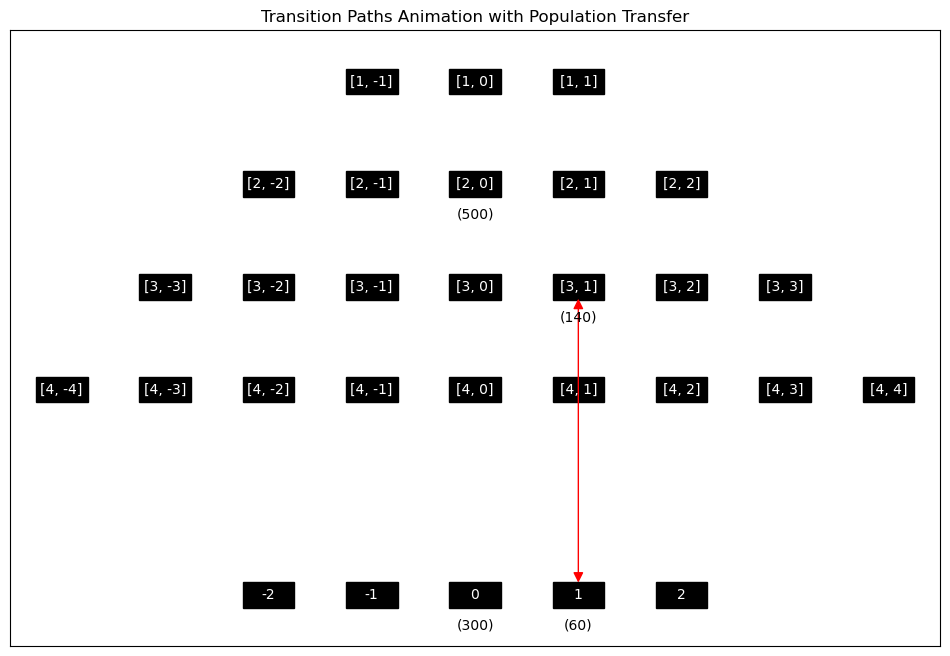

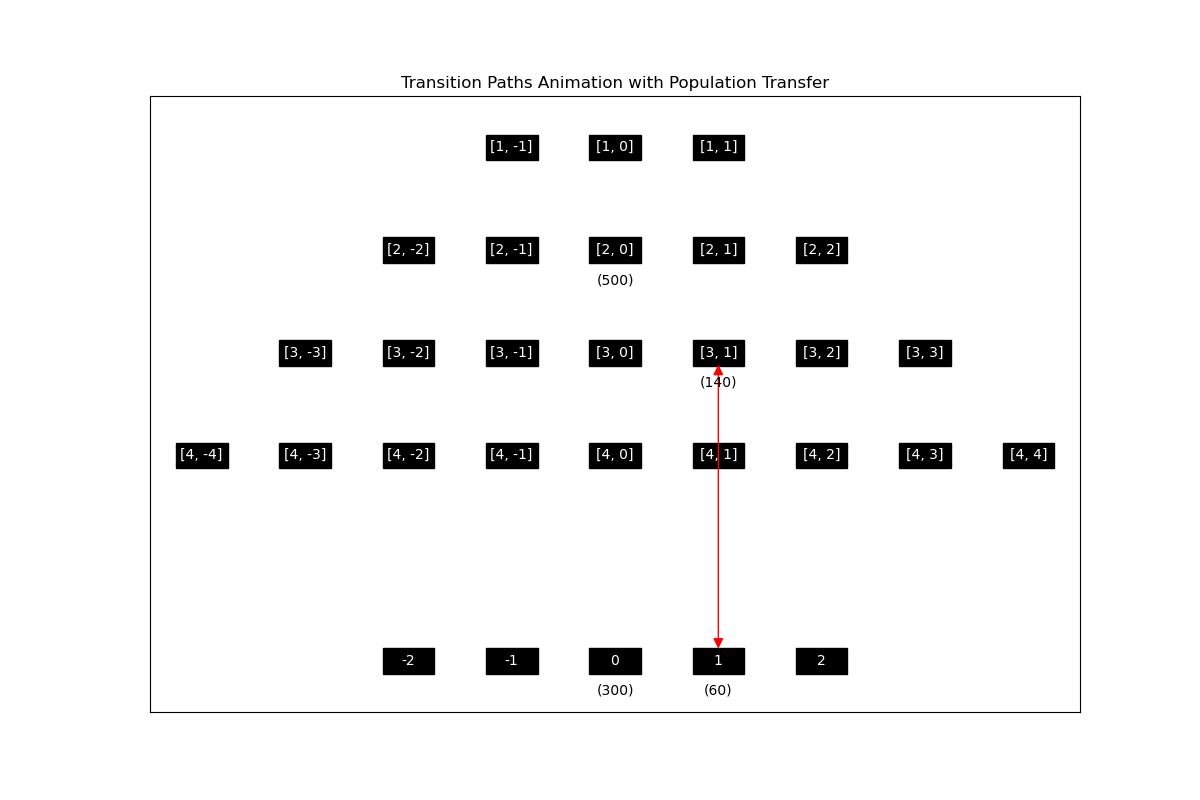

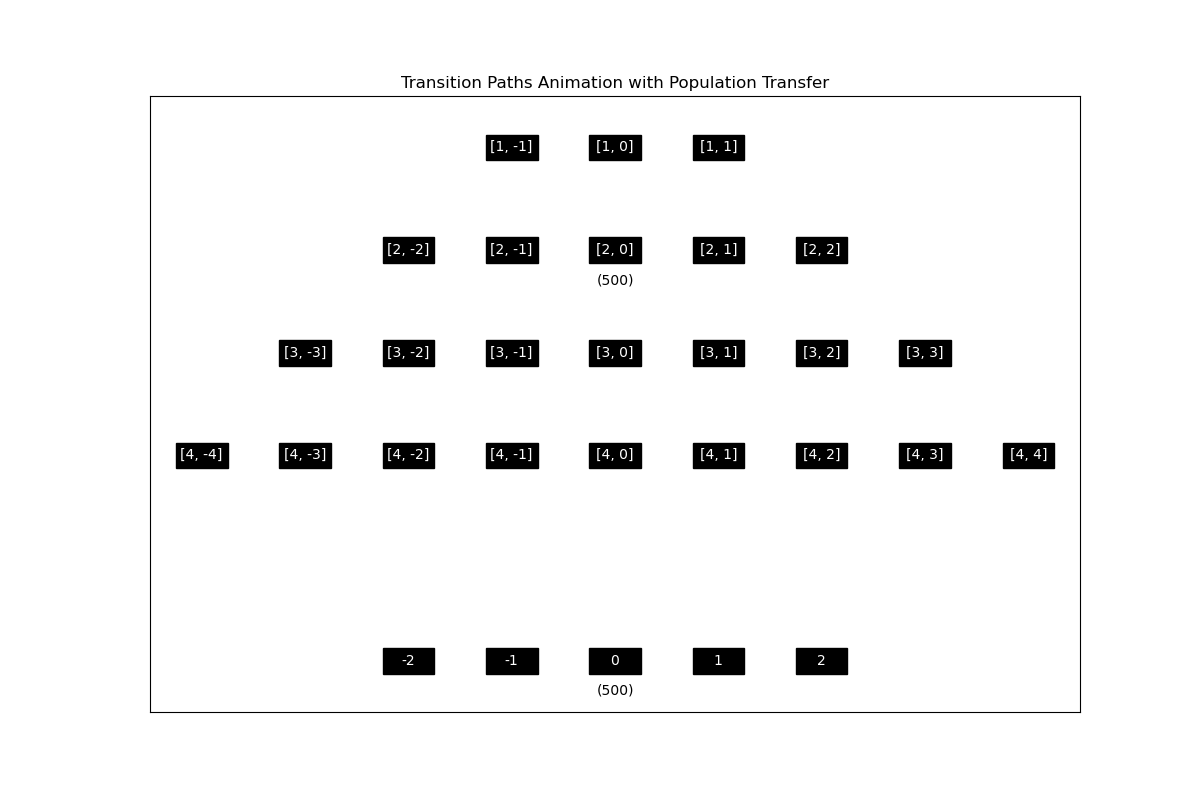

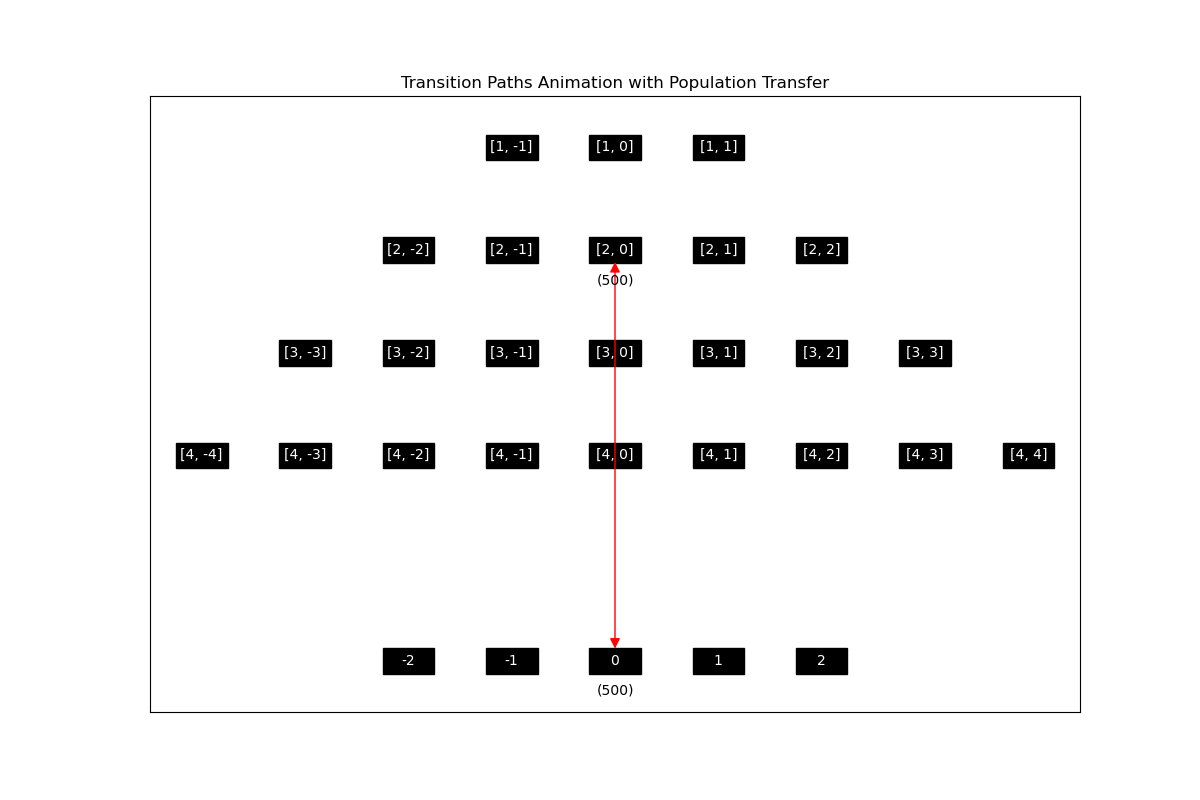

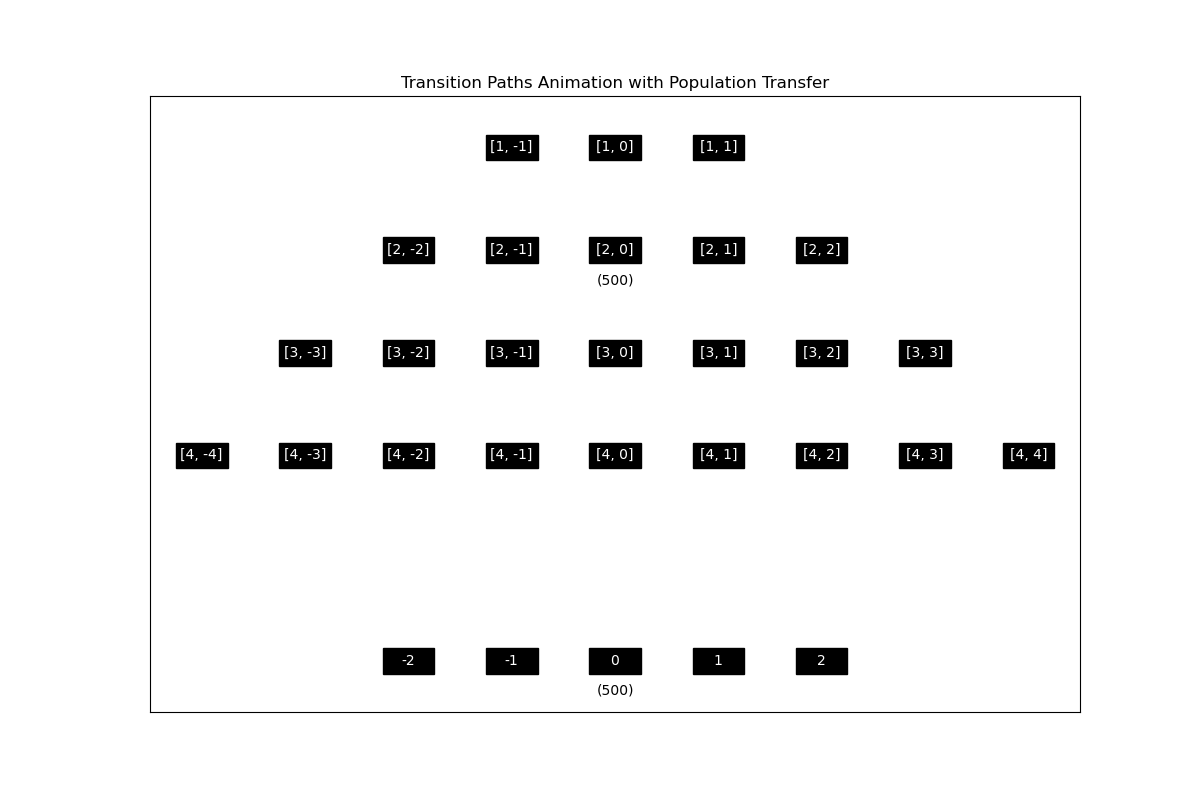

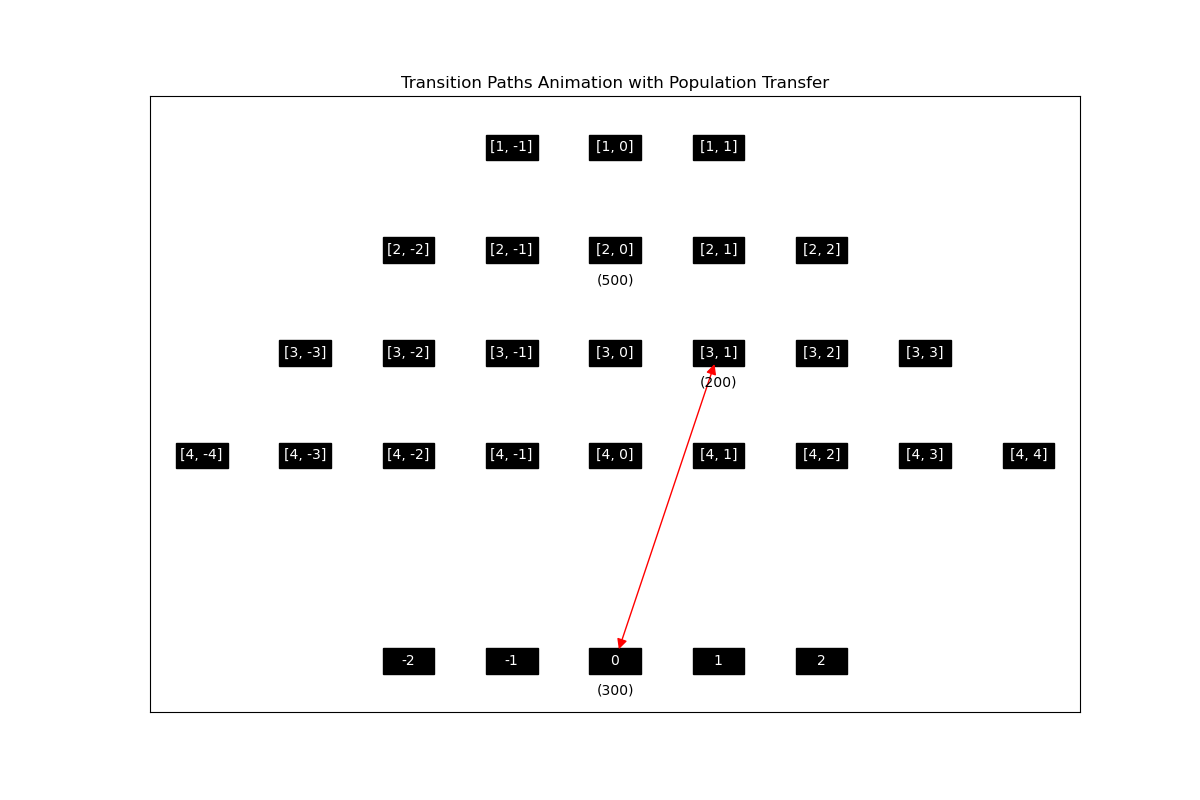

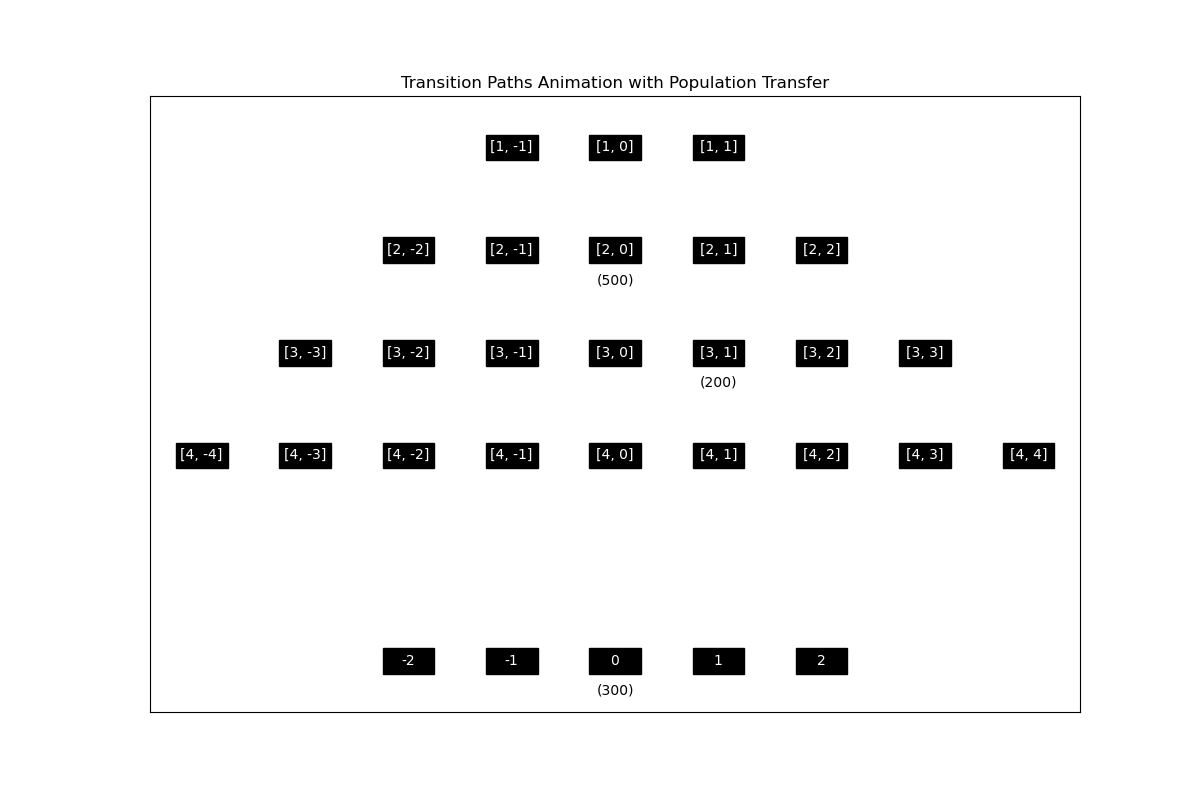

In [51]:
list_of_paths = [
    [0, [2, 0]],    # First transfer
    [0, [3, 1]],    # Second transfer
    [[3, 1], 1]     # Third transfer
]
transfer_fractions = [0.5, 0.4, 0.3]  # 50%, 40%, 30% of current population transfers
initial_population = 1000

animate_paths_with_population_transfer(
    list_of_paths, 
    transfer_fractions, 
    initial_population,
    save_path='population_transfer.gif'
)

In [18]:
%matplotlib widget

In [ ]:
def draw_frame(step, current_edge=None):
    plt.clf()
    ax = plt.gca()
    
    # Draw nodes
    xh = 0.5
    yh = 0.25
    for node, (x, y) in pos.items():
        # Draw node rectangle
        ax.add_patch(Rectangle((x - xh / 2, y - yh / 2), xh, yh, 
                                 fill=True, color='black', ec='black', lw=1))
        
        # Add population text below node if it has a population
        if node in population_history and step in population_history[node]:
            plt.text(x, y - yh/2 - 0.1, f'({population_history[node][step]})', 
                     ha='center', va='top', color='black')
    
    # Draw single current edge if exists
    if current_edge:
        temp_graph = nx.DiGraph()
        temp_graph.add_nodes_from(G.nodes(data=True))
        
        # Add two directed edges for bidirectional representation
        temp_graph.add_edge(*current_edge)
        temp_graph.add_edge(current_edge[1], current_edge[0])
        
        nx.draw_networkx_edges(temp_graph, pos, alpha=1, edge_color='red', 
                               arrows=True, arrowstyle='-|>', arrowsize=15)
    
    # Draw node labels
    nx.draw_networkx_labels(G, pos, font_size=10, font_color='white')
    
    plt.xlim(-4.5, 4.5)
    plt.ylim(-2.5, 3.5)
    plt.title('Transition Paths Animation with Population Transfer')
    
    # Capture frame for GIF
    frames.append(capture_frame())